# Data Exploration

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from consts import (
    TRAIN_CALC_CSV,
    TRAIN_MASS_CSV,
    DICOM_INFO_CSV,
    META_CSV,
    TEST_CALC_CSV,
    TEST_MASS_CSV,
    IMAGE_DIR,
    CSV_DIR,
    DATA_DIR
)

## dicom_info

In [2]:
dicom_df: pd.DataFrame = pd.read_csv(DICOM_INFO_CSV)

In [3]:
dicom_df.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [4]:
dicom_df.shape

(10237, 38)

In [5]:
dicom_df.columns

Index(['file_path', 'image_path', 'AccessionNumber', 'BitsAllocated',
       'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate',
       'ContentTime', 'ConversionType', 'HighBit', 'InstanceNumber',
       'LargestImagePixelValue', 'Laterality', 'Modality', 'PatientBirthDate',
       'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex',
       'PhotometricInterpretation', 'PixelRepresentation',
       'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID',
       'SamplesPerPixel', 'SecondaryCaptureDeviceManufacturer',
       'SecondaryCaptureDeviceManufacturerModelName', 'SeriesDescription',
       'SeriesInstanceUID', 'SeriesNumber', 'SmallestImagePixelValue',
       'SpecificCharacterSet', 'StudyDate', 'StudyID', 'StudyInstanceUID',
       'StudyTime'],
      dtype='object')

In [6]:
dicom_df.isna().sum()

file_path                                          0
image_path                                         0
AccessionNumber                                10237
BitsAllocated                                      0
BitsStored                                         0
BodyPartExamined                                   0
Columns                                            0
ContentDate                                        0
ContentTime                                        0
ConversionType                                     0
HighBit                                            0
InstanceNumber                                     0
LargestImagePixelValue                             0
Laterality                                       566
Modality                                           0
PatientBirthDate                               10237
PatientID                                          0
PatientName                                        0
PatientOrientation                            

In [7]:
dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [8]:
dicom_df.dtypes

file_path                                       object
image_path                                      object
AccessionNumber                                float64
BitsAllocated                                    int64
BitsStored                                       int64
BodyPartExamined                                object
Columns                                          int64
ContentDate                                      int64
ContentTime                                    float64
ConversionType                                  object
HighBit                                          int64
InstanceNumber                                   int64
LargestImagePixelValue                           int64
Laterality                                      object
Modality                                        object
PatientBirthDate                               float64
PatientID                                       object
PatientName                                     object
PatientOri

In [9]:
dicom_df['SeriesDescription'].describe()

count               9671
unique                 3
top       cropped images
freq                3567
Name: SeriesDescription, dtype: object

In [10]:
unique_series = dicom_df["SeriesDescription"].unique()
print(unique_series)

['cropped images' 'full mammogram images' nan 'ROI mask images']


***SeriesDescription Column***

The `SeriesDescription` column in the `dicom_df` DataFrame provides a textual description of the image series. 
This column helps to categorize and identify the type of images in the dataset. 
Below are the unique values found in this column along with their descriptions:

- **cropped images**: These images are cropped versions of the original mammogram images, focusing on specific regions of interest.
- **full mammogram images**: These are the complete mammogram images without any cropping, showing the entire breast.
- **ROI mask images**: These images contain masks that highlight regions of interest (ROI) within the mammogram images. These masks are used for various analysis and diagnostic purposes.
- **NaN**: Some entries in this column are missing and are represented as NaN (Not a Number).

The `SeriesDescription` column is crucial for understanding the context and type of each image in the dataset, which can be useful for further analysis and processing.

In [11]:
cropped_images = dicom_df[dicom_df.SeriesDescription=="cropped images"].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [12]:
full_mammogram = dicom_df[dicom_df.SeriesDescription=="full mammogram images"].image_path
full_mammogram.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [13]:
roi_mask = dicom_df[dicom_df.SeriesDescription=="ROI mask images"].image_path
roi_mask.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [14]:
def get_image_file_name(data, new_dict):
    """
    /kaggle
    /input
    /cbis-ddsm-breast-cancer-image-dataset
    /jpeg
    /1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304 [5]
    /1-172.jpg
    
    return path at index [5] after split depends on split('\')
    """
    for dicom in data:
        key = dicom.split('/')[-2]
#         print(key)
        new_dict[key] = dicom
    print(f"the length of dataset ==> {len(new_dict.keys())}")

In [15]:
cropped_images_dict = dict()
full_mammo_dict = dict()
roi_img_dict = dict()

get_image_file_name(cropped_images, cropped_images_dict)
get_image_file_name(full_mammogram, full_mammo_dict)
get_image_file_name(roi_mask, roi_img_dict)

the length of dataset ==> 3567
the length of dataset ==> 2857
the length of dataset ==> 3247


In [16]:
def replace_path(sample, old_path, new_path):
    return sample.replace(old_path, new_path, regex=True)

In [17]:
correct_dir = "../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg"
cropped_images = replace_path(cropped_images, "CBIS-DDSM/jpeg", correct_dir)
print('Cropped Images paths:')
print(cropped_images.iloc[0])


Cropped Images paths:
../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg


In [18]:
full_mammogram = replace_path(full_mammogram, "CBIS-DDSM/jpeg", correct_dir)
print('\nFull mammo Images paths:')
print(full_mammogram.iloc[0])


Full mammo Images paths:
../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg


In [19]:
roi_mask = replace_path(roi_mask, "CBIS-DDSM/jpeg", correct_dir)
print('\nROI Mask Images paths:')
print(roi_mask.iloc[0])


ROI Mask Images paths:
../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [20]:
def plot_samples(sample, row=15, col=15):
    plt.figure(figsize=(row, col))
    for i, file in enumerate(sample[0:5]):
        cropped_images_show = PIL.Image.open(file)
        gray_img= cropped_images_show.convert("L")
        plt.subplot(1,5,i+1)
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
    plt.show()

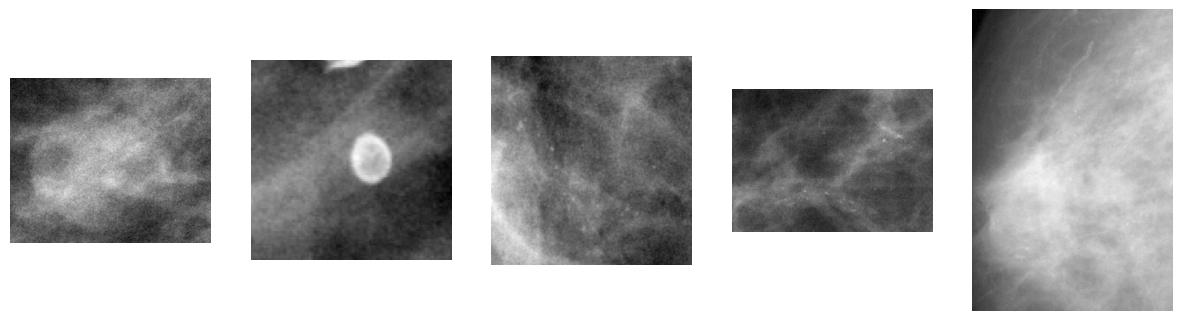

In [21]:
plot_samples(cropped_images, 15, 15)

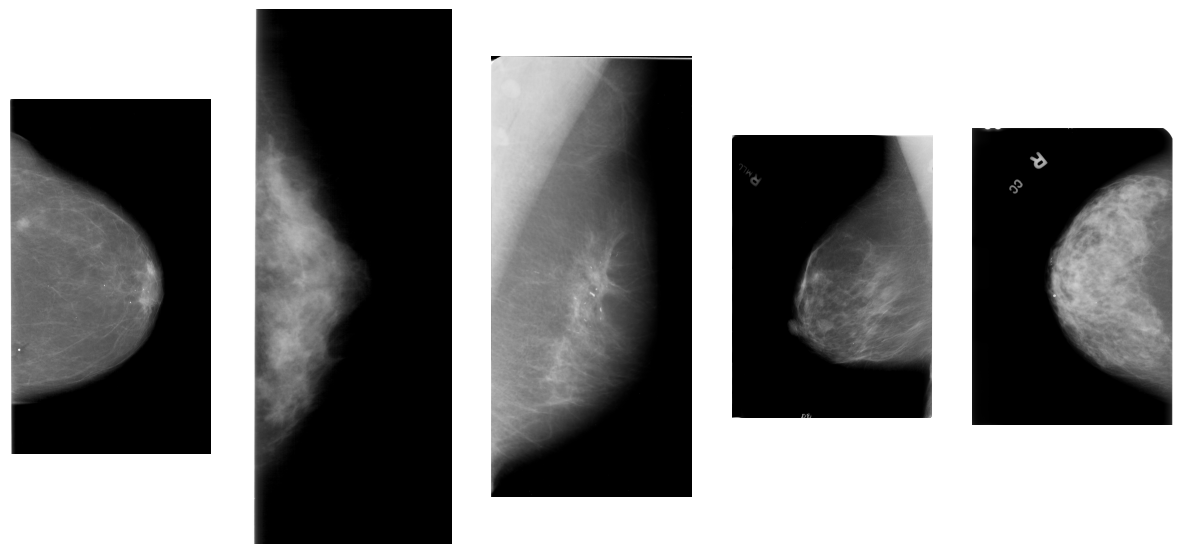

In [22]:
plot_samples(full_mammogram, 15, 15)

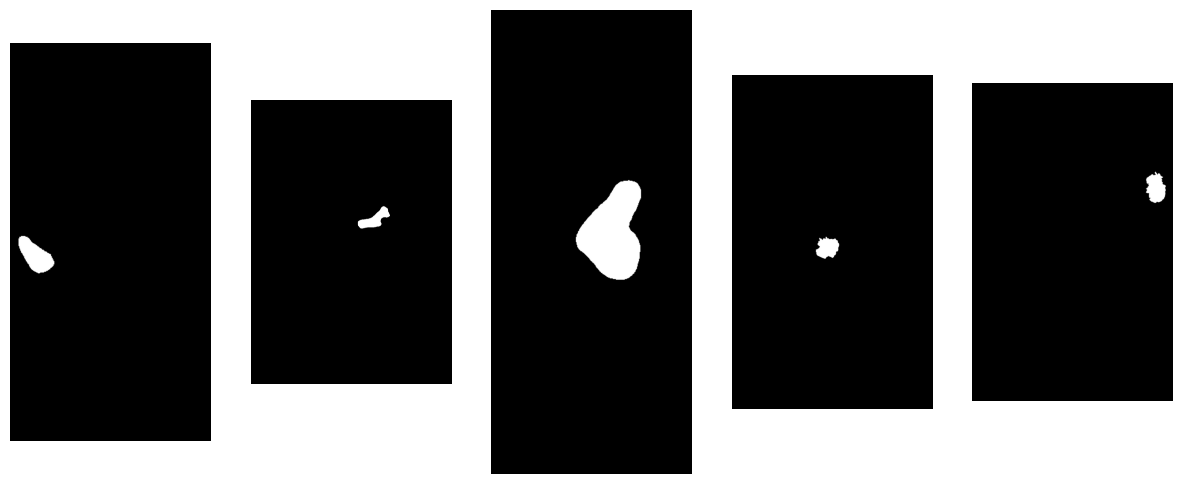

In [23]:
plot_samples(roi_mask, 15, 15)

****DICOM DataFrame Overview****

The `dicom_df` DataFrame contains metadata information about DICOM images in the dataset. It has 10,237 rows and 38 columns. Below is a brief description of some key columns:

- **file_path**: Path to the DICOM file.
- **image_path**: Path to the corresponding image file.
- **AccessionNumber**: Accession number (not available in this dataset).
- **BitsAllocated**: Number of bits allocated for each pixel sample.
- **BitsStored**: Number of bits stored for each pixel sample.
- **BodyPartExamined**: The body part examined (e.g., BREAST).
- **Columns**: Number of columns in the image.
- **ContentDate**: The date the image was created.
- **ContentTime**: The time the image was created.
- **ConversionType**: Type of conversion applied to the image.
- **HighBit**: Highest bit set in the image pixel data.
- **InstanceNumber**: Instance number of the image.
- **LargestImagePixelValue**: Largest pixel value in the image.
- **Laterality**: Laterality of the body part (e.g., R for right, L for left).
- **Modality**: Type of imaging modality (e.g., MG for mammography).
- **PatientID**: Unique identifier for the patient.
- **PatientName**: Name of the patient.
- **PatientOrientation**: Orientation of the patient during the imaging.
- **PhotometricInterpretation**: Photometric interpretation of the image (e.g., MONOCHROME2).
- **PixelRepresentation**: Pixel representation (e.g., 0 for unsigned integer).
- **Rows**: Number of rows in the image.
- **SOPClassUID**: Unique identifier for the SOP class.
- **SOPInstanceUID**: Unique identifier for the SOP instance.
- **SamplesPerPixel**: Number of samples per pixel.
- **SecondaryCaptureDeviceManufacturer**: Manufacturer of the secondary capture device.
- **SecondaryCaptureDeviceManufacturerModelName**: Model name of the secondary capture device.
- **SeriesDescription**: Description of the image series.
- **SeriesInstanceUID**: Unique identifier for the series instance.
- **SeriesNumber**: Number of the series.
- **SmallestImagePixelValue**: Smallest pixel value in the image.
- **SpecificCharacterSet**: Character set used in the dataset.
- **StudyDate**: Date of the study.
- **StudyID**: Unique identifier for the study.
- **StudyInstanceUID**: Unique identifier for the study instance.
- **StudyTime**: Time of the study.

Note: Some columns have missing values, such as `AccessionNumber`, `PatientBirthDate`, `PatientSex`, and `ReferringPhysicianName`.

In [23]:
mass_train = pd.read_csv("../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv")

In [24]:
mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [25]:
mass_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [26]:
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                        'image view': 'image_view',
                                        'abnormality id': 'abnormality_id',
                                        'abnormality type': 'abnormality_type',
                                        'mass shape': 'mass_shape',
                                        'mass margins': 'mass_margins',
                                        'image file path': 'image_file_path',
                                        'cropped image file path': 'cropped_image_file_path',
                                        'ROI mask file path': 'ROI_mask_file_path'})

In [27]:
mass_train.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [28]:
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [29]:
print(f'Shape of mass_train: {mass_train.shape}')

Shape of mass_train: (1318, 14)


In [30]:
calc_train = pd.read_csv("../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv")

In [31]:
calc_train= calc_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})

In [32]:
calc_train.head()


,patient_id,breast density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc type,calc distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [33]:
import pandas as pd

class ImagePathFixer:
    def __init__(self, full_mammogram, cropped_images, roi_mask, correct_dir, old_base="CBIS-DDSM/jpeg"):
        """
        Initialize the fixer with image path collections and a correct base directory.
        
        :param full_mammogram: List or Series of full mammogram image paths.
        :param cropped_images: List or Series of cropped image paths.
        :param roi_mask: List or Series of ROI mask image paths.
        :param correct_dir: The correct directory to use (e.g., "../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg").
        :param old_base: The old base directory string to be replaced.
        """
        self.correct_dir = correct_dir
        self.old_base = old_base
        
        # Replace the old base in all provided paths.
        self.full_mammogram = self.replace_path(full_mammogram, old_base, correct_dir)
        self.cropped_images = self.replace_path(cropped_images, old_base, correct_dir)
        self.roi_mask = self.replace_path(roi_mask, old_base, correct_dir)
        
        # Create lookup dictionaries from image file names.
        self.full_mammo_dict = self.get_image_file_name(self.full_mammogram)
        self.cropped_images_dict = self.get_image_file_name(self.cropped_images)
        self.roi_img_dict = self.get_image_file_name(self.roi_mask)

    def replace_path(self, sample, old_path, new_path):
        """
        Replace occurrences of the old path with the new path.
        Accepts either a list of strings or a Pandas Series.
        """
        if isinstance(sample, list):
            return [s.replace(old_path, new_path) for s in sample]
        elif isinstance(sample, pd.Series):
            return sample.str.replace(old_path, new_path, regex=True)
        else:
            raise ValueError("Unsupported type for sample; expected list or Pandas Series.")

    def get_image_file_name(self, data):
        """
        Build a dictionary mapping a key (derived from the image path) to the full path.
        The key is assumed to be the second-to-last element in the path.
        """
        new_dict = {}
        for path in data:
            parts = path.split('/')
            if len(parts) >= 2:
                key = parts[-2]  # Adjust key extraction if necessary.
                new_dict[key] = path
        print(f"Dictionary created with {len(new_dict.keys())} keys.")
        return new_dict

    def fix_image_path(self, df):
        """
        Update the image paths in the DataFrame using the lookup dictionaries.
        Assumptions:
          - Column index 11 uses full_mammo_dict.
          - Column index 12 uses cropped_images_dict.
          - Column index 13 uses roi_img_dict.
          
        :param df: The Pandas DataFrame (e.g., your training dataset) to update.
        :return: The updated DataFrame.
        """
        for indx in range(len(df)):
            # Process column index 11 (full mammogram image paths)
            try:
                path_11 = df.iloc[indx, 11]
                if pd.isna(path_11):
                    continue
                parts = path_11.split('/')
                if len(parts) > 2:
                    key = parts[2]  # Adjust the index if your key position changes.
                    if key in self.full_mammo_dict:
                        df.iloc[indx, 11] = self.full_mammo_dict[key]
                    else:
                        df.iloc[indx, 11] = None
                        print(f"KeyError: '{key}' not found in full_mammo_dict for row {indx}")
            except Exception as e:
                print(f"Error processing row {indx} at column 11: {e}")
            
            # Process column index 12 (cropped image paths)
            try:
                path_12 = df.iloc[indx, 12]
                if pd.isna(path_12):
                    continue
                parts = path_12.split('/')
                if len(parts) > 2:
                    key = parts[2]
                    if key in self.cropped_images_dict:
                        df.iloc[indx, 12] = self.cropped_images_dict[key]
                    else:
                        df.iloc[indx, 12] = None
                        print(f"KeyError: '{key}' not found in cropped_images_dict for row {indx}")
            except Exception as e:
                print(f"Error processing row {indx} at column 12: {e}")
            
            # Process column index 13 (ROI mask image paths)
            try:
                path_13 = df.iloc[indx, 13]
                if pd.isna(path_13):
                    continue
                parts = path_13.split('/')
                if len(parts) > 2:
                    key = parts[2]
                    if key in self.roi_img_dict:
                        df.iloc[indx, 13] = self.roi_img_dict[key]
                    else:
                        df.iloc[indx, 13] = None
                        print(f"KeyError: '{key}' not found in roi_img_dict for row {indx}")
            except Exception as e:
                print(f"Error processing row {indx} at column 13: {e}")
        return df


correct_dir = "../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg"
fixer = ImagePathFixer(full_mammogram, cropped_images, roi_mask, correct_dir)


Dictionary created with 2857 keys.
Dictionary created with 3567 keys.
Dictionary created with 3247 keys.


In [34]:
mass_train = fixer.fix_image_path(mass_train)
mass_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...


In [35]:
print(f'Shape of mass_train: {mass_train.shape}')


Shape of mass_train: (1318, 14)


In [36]:
calc_train = fixer.fix_image_path(calc_train)
calc_train.head()

KeyError: '1.3.6.1.4.1.9590.100.1.2.27611247910023474515584644283556391565' not found in cropped_images_dict for row 344
KeyError: '1.3.6.1.4.1.9590.100.1.2.323173986211744534717152497940376023803' not found in roi_img_dict for row 344
KeyError: '1.3.6.1.4.1.9590.100.1.2.348822970413183698610798947061334416506' not found in cropped_images_dict for row 1216
KeyError: '1.3.6.1.4.1.9590.100.1.2.348822970413183698610798947061334416506' not found in roi_img_dict for row 1216


,patient_id,breast density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc type,calc distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...,../kaggle/data/cbis-ddsm-breast-cancer-image-d...


## Preparing Test Datasets

In [37]:
calc_test = pd.read_csv("../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv")
mass_test = pd.read_csv("../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv")

In [38]:
calc_test= calc_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})

mass_test= mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})

In [39]:
calc_test = fixer.fix_image_path(calc_test)
mass_test = fixer.fix_image_path(mass_test)

KeyError: '1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992' not found in full_mammo_dict for row 0
KeyError: '1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515' not found in roi_img_dict for row 0
KeyError: '1.3.6.1.4.1.9590.100.1.2.174390361112646747718661211471328897934' not found in full_mammo_dict for row 1
KeyError: '1.3.6.1.4.1.9590.100.1.2.188613955710170417803011787532523988680' not found in roi_img_dict for row 1
KeyError: '1.3.6.1.4.1.9590.100.1.2.263861248711313923336051913560309963304' not found in full_mammo_dict for row 2
KeyError: '1.3.6.1.4.1.9590.100.1.2.244876997513875090239564803900035037851' not found in roi_img_dict for row 2
KeyError: '1.3.6.1.4.1.9590.100.1.2.263861248711313923336051913560309963304' not found in full_mammo_dict for row 3
KeyError: '1.3.6.1.4.1.9590.100.1.2.360550081712464813321995483083632007570' not found in roi_img_dict for row 3
KeyError: '1.3.6.1.4.1.9590.100.1.2.44262460211112930513355519060642708846' not foun

In [40]:
calc_test.shape

(326, 14)

In [41]:
mass_test.shape

(378, 14)

In [42]:
dataset = pd.concat([mass_train, mass_test, calc_train, calc_test], axis=0)

In [43]:
dataset.shape

(3568, 17)

In [44]:
dataset.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [45]:
mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 

In [46]:
img_size = (224, 224, 3)

In [47]:
dataset['pathology'] = dataset['pathology'].map(mapper)

dataset_images = np.array(dataset[dataset["pathology"].notnull()]["image_file_path"].tolist())
dataset_labels = np.array(dataset[dataset["pathology"].notnull()]["pathology"].tolist())

In [48]:
labels = pd.Series(dataset_labels)
labels.value_counts()

benign_counts = labels.value_counts()[0]
malignant_counts = labels.value_counts()[1]

print(f"Benign: {benign_counts}")
print(f"Malignant: {malignant_counts}")

Benign: 2111
Malignant: 1457


In [49]:
dataset_images

array(['../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg',
       '../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/1-207.jpg',
       '../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/1-250.jpg',
       ..., None,
       '../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.232308535910657861814985637132814817912/1-091.jpg',
       None], dtype=object)

## Image Preprocessing

In [60]:
import os
import uuid
import random
import gc
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Data augmentation using TensorFlow's tf.image module.
def augment_image(image):
    # Apply random transformations to the image tensor.
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    return image

# Resize image to (224, 224, 3)
def resize_image(image_tensor):
    return tf.image.resize(image_tensor, [224, 224])

# Function to display a few sample images for verification.
def plot_samples(sample, row=15, col=15):
    plt.figure(figsize=(row, col))
    for i, file in enumerate(sample[0:5]):
        img = Image.open(file).convert("RGB")
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Function to copy and augment images based on labels using a numpy array of image paths.
def copy_images_with_unique_filenames(images, labels, destination, target_count=None):
    """
    Copy images from a NumPy array 'images' (which stores image paths) to a destination folder,
    applying augmentation to balance classes if needed.

    :param images: NumPy array (or list) of image paths.
    :param labels: List or array of labels corresponding to each image (0 for benign, 1 for malignant).
    :param destination: Destination directory to store the augmented images.
    :param target_count: If provided, the number of images desired per class for balancing.
    """
    benign_images = 0
    malignant_images = 0
    skipped_images = []

    # Create destination subfolders for labels '0' and '1'
    dest_dir_0 = os.path.join(destination, '0')
    os.makedirs(dest_dir_0, exist_ok=True)
    dest_dir_1 = os.path.join(destination, '1')
    os.makedirs(dest_dir_1, exist_ok=True)

    benign_images_list = []
    malignant_images_list = []

    for i, (img_path, label) in enumerate(zip(images, labels)):
        if os.path.exists(img_path):
            try:
                filename = os.path.basename(img_path)
                unique_filename = f"{uuid.uuid4().hex}_{filename}"
                
                with Image.open(img_path) as img:
                    img = img.convert('RGB')
                    # Convert to tensor, resize, and augment.
                    img_tensor = tf.convert_to_tensor(img)
                    resized_img_tensor = resize_image(img_tensor)
                    augmented_image_tensor = augment_image(resized_img_tensor)
                    # Convert tensor back to PIL image.
                    augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image_tensor)

                    if label == 0:
                        benign_images_list.append(unique_filename)
                        dest_path = os.path.join(dest_dir_0, unique_filename)
                        augmented_image.save(dest_path, 'JPEG')
                        benign_images += 1
                    elif label == 1:
                        malignant_images_list.append(unique_filename)
                        dest_path = os.path.join(dest_dir_1, unique_filename)
                        augmented_image.save(dest_path, 'JPEG')
                        malignant_images += 1

            except Exception as e:
                print(f"Error copying image {img_path}: {e}")
                skipped_images.append(img_path)
        else:
            print(f"Image not found: {img_path}")
            skipped_images.append(img_path)

    # Balance classes by augmenting images from the smaller class if needed.
    benign_count = len(benign_images_list)
    malignant_count = len(malignant_images_list)

    if benign_count < malignant_count:
        augment_and_save_images(benign_images_list, dest_dir_0, malignant_count - benign_count)
    elif malignant_count < benign_count:
        augment_and_save_images(malignant_images_list, dest_dir_1, benign_count - malignant_count)

    # Optionally, if target_count is provided, perform additional augmentation to reach that count.
    if target_count is not None:
        augment_and_save_images(benign_images_list, dest_dir_0, target_count)
        augment_and_save_images(malignant_images_list, dest_dir_1, target_count)

    print("Data balancing and augmentation complete.")
    print(f"Benign images copied (label 0): {benign_images}")
    print(f"Malignant images copied (label 1): {malignant_images}")
    print(f"Total skipped images: {len(skipped_images)}")
    if skipped_images:
        print("Skipped images:")
        for img in skipped_images:
            print(img)

    del skipped_images, benign_images_list, malignant_images_list
    gc.collect()

# Function to augment and save images to balance the dataset.
def augment_and_save_images(images_list, destination_dir, num_augments):
    for i in range(num_augments):
        img_name = random.choice(images_list)
        abs_path = os.path.join(destination_dir, img_name)
        try:
            with Image.open(abs_path) as img:
                img = img.convert('RGB')
                img_tensor = tf.convert_to_tensor(img)
                augmented_image_tensor = augment_image(img_tensor)
                augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image_tensor)
                img_name_without_ext = os.path.splitext(img_name)[0]
                new_filename = f"{img_name_without_ext}_aug{i}.jpg"
                augmented_image.save(os.path.join(destination_dir, new_filename), 'JPEG')
        except Exception as e:
            print(f"Error augmenting image {abs_path}: {e}")

# Example usage:
# Assume you have a NumPy array 'image_paths_np' containing all image paths
# and a corresponding NumPy array (or list) 'calc_labels' storing labels.
# For instance:
# image_paths_np = np.array([...])  # All image paths
# calc_labels = np.array([...])     # Corresponding labels (0 or 1)

destination_dir = "../kaggle/working/merged_images"
target_count = int((len(labels) * 5) // 2)  # Example target count for balancing

copy_images_with_unique_filenames(dataset_images, labels, destination_dir, target_count)


Error copying image ../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Error copying image ../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/1-207.jpg: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Error copying image ../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/1-250.jpg: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Error copying image ../kaggle/data/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Error copying ima

IndexError: Cannot choose from an empty sequence

In [51]:
import os
import uuid
import random
import gc
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Data augmentation using TensorFlow's tf.image module.
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    return image

def resize_image(image_tensor):
    return tf.image.resize(image_tensor, [224, 224])

def plot_samples(sample, row=15, col=15):
    plt.figure(figsize=(row, col))
    for i, file in enumerate(sample[0:5]):
        img = Image.open(file).convert("RGB")
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

def copy_images_with_unique_filenames(images, labels, destination, target_count=None):
    benign_images = 0
    malignant_images = 0
    skipped_images = []

    # Create destination subfolders for labels '0' and '1'
    dest_dir_0 = os.path.join(destination, '0')
    os.makedirs(dest_dir_0, exist_ok=True)
    dest_dir_1 = os.path.join(destination, '1')
    os.makedirs(dest_dir_1, exist_ok=True)

    benign_images_list = []
    malignant_images_list = []

    for i, (img_path, label) in enumerate(zip(images, labels)):
        # Skip if img_path is None
        if img_path is None:
            print(f"Skipping image at index {i} because it is None")
            skipped_images.append(img_path)
            continue
        
        if os.path.exists(img_path):
            try:
                filename = os.path.basename(img_path)
                unique_filename = f"{uuid.uuid4().hex}_{filename}"
                
                with Image.open(img_path) as img:
                    img = img.convert('RGB')
                    img_tensor = tf.convert_to_tensor(img)
                    resized_img_tensor = resize_image(img_tensor)
                    augmented_image_tensor = augment_image(resized_img_tensor)
                    augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image_tensor)

                    if label == 0:
                        benign_images_list.append(unique_filename)
                        dest_path = os.path.join(dest_dir_0, unique_filename)
                        augmented_image.save(dest_path, 'JPEG')
                        benign_images += 1
                    elif label == 1:
                        malignant_images_list.append(unique_filename)
                        dest_path = os.path.join(dest_dir_1, unique_filename)
                        augmented_image.save(dest_path, 'JPEG')
                        malignant_images += 1

            except Exception as e:
                print(f"Error copying image {img_path}: {e}")
                skipped_images.append(img_path)
        else:
            print(f"Image not found: {img_path}")
            skipped_images.append(img_path)

    # Balance classes if needed
    benign_count = len(benign_images_list)
    malignant_count = len(malignant_images_list)
    if benign_count < malignant_count:
        augment_and_save_images(benign_images_list, dest_dir_0, malignant_count - benign_count)
    elif malignant_count < benign_count:
        augment_and_save_images(malignant_images_list, dest_dir_1, benign_count - malignant_count)
    if target_count is not None:
        augment_and_save_images(benign_images_list, dest_dir_0, target_count)
        augment_and_save_images(malignant_images_list, dest_dir_1, target_count)
    print("Data balancing and augmentation complete.")
    print(f"Benign images copied (label 0): {benign_images}")
    print(f"Malignant images copied (label 1): {malignant_images}")
    print(f"Total skipped images: {len(skipped_images)}")
    if skipped_images:
        for img in skipped_images:
            print(img)
    del skipped_images, benign_images_list, malignant_images_list
    gc.collect()

def augment_and_save_images(images_list, destination_dir, num_augments):
    for i in range(num_augments):
        img_name = random.choice(images_list)
        abs_path = os.path.join(destination_dir, img_name)
        try:
            with Image.open(abs_path) as img:
                img = img.convert('RGB')
                img_tensor = tf.convert_to_tensor(img)
                augmented_image_tensor = augment_image(img_tensor)
                augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image_tensor)
                img_name_without_ext = os.path.splitext(img_name)[0]
                new_filename = f"{img_name_without_ext}_aug{i}.jpg"
                augmented_image.save(os.path.join(destination_dir, new_filename), 'JPEG')
        except Exception as e:
            print(f"Error augmenting image {abs_path}: {e}")

pwd = os.getcwd().split("/processor")[0]
pwd = f"{pwd}/kaggle/working/merged_images"
os.makedirs(pwd, exist_ok=True)
destination_dir = pwd
target_count = int((len(labels) * 5) // 2)  

copy_images_with_unique_filenames(dataset_images, labels, destination_dir, target_count)


2025-03-05 10:57:10.618649: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Skipping image at index 3242 because it is None
Skipping image at index 3243 because it is None
Skipping image at index 3244 because it is None
Skipping image at index 3245 because it is None
Skipping image at index 3246 because it is None
Skipping image at index 3247 because it is None
Skipping image at index 3248 because it is None
Skipping image at index 3249 because it is None
Skipping image at index 3250 because it is None
Skipping image at index 3251 because it is None
Skipping image at index 3252 because it is None
Skipping image at index 3253 because it is None
Skipping image at index 3254 because it is None
Skipping image at index 3255 because it is None
Skipping image at index 3256 because it is None
Skipping image at index 3257 because it is None
Skipping image at index 3258 because it is None
Skipping image at index 3259 because it is None
Skipping image at index 3260 because it is None
Skipping image at index 3261 because it is None
Skipping image at index 3262 because it 

In [52]:
data_dir = '../kaggle/working/merged_images'  # Update with your dataset path

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    seed=30,
    shuffle=True,
    batch_size=13
)

Found 43095 files belonging to 2 classes.


Shape of Images: (13, 224, 224, 3)
Shape of Labels: (13, 2)

First 10 Labels (One-Hot Encoded):
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


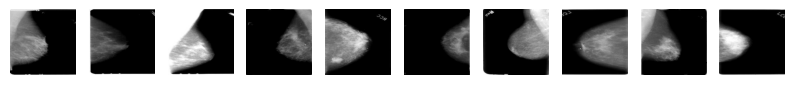

2025-03-05 11:15:49.064295: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [53]:
for images, labels in full_dataset.take(1):  # Take the first batch
    print("Shape of Images:", images.shape)  # Should be (batch_size, 224, 224, 3)
    print("Shape of Labels:", labels.shape)  # Should be (batch_size, number_of_classes)
    
    # Print first 5 label values
    print("\nFirst 10 Labels (One-Hot Encoded):\n", labels.numpy()[:10])
    
    # Display some images with their labels
    plt.figure(figsize=(10, 5))
    for i in range(min(10, len(images))): 
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to image format
        plt.axis("off")
    plt.show()

In [54]:
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Step 3: Split the dataset into train, validation, and test sets
train_size = int(0.8* total_samples)                 # 80% for training
test_size = total_samples - train_size                # 20% for testing

# Create train, validation, and test datasets
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)

# Prefetch to Improve Performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Print the number of samples in each dataset
print(f"Train samples:      {train_size}     batches(8) ==> {train_size*13}")
print(f"Test samples:       {test_size}      batches(8) ==> {test_size*13}")

Train samples:      2652     batches(8) ==> 34476
Test samples:       663      batches(8) ==> 8619


In [55]:
def check_missing_samples(dataset, dataset_name):
    missing_count = 0
    for batch, labels in dataset:
        batch_nan = np.any(np.isnan(batch.numpy()))  # Check if any image has NaN values
        label_nan = np.any(np.isnan(labels.numpy()))  # Check if any label is NaN
        
        if batch_nan or label_nan:
            missing_count += 1
    
    print(f"{dataset_name}: Found {missing_count} batches with missing values")

# Check both training and test datasets
check_missing_samples(train_dataset, "Train Dataset")
check_missing_samples(test_dataset, "Test Dataset")


2025-03-05 11:16:13.564365: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Train Dataset: Found 0 batches with missing values
Test Dataset: Found 0 batches with missing values


In [56]:
import cv2

In [89]:
#applies a negative transformation to medical images (benign & malignant cases) and saves them in a new directory.
#The negative transformation helps enhance contrast and highlight subtle patterns,


# Define the data directory and the output directory
data_dir = '../kaggle/working/merged_images'
Neg_dir = '../kaggle/working/Negative_Images'

# Create the output directory if it doesn't exist
os.makedirs(Neg_dir, exist_ok=True)

# Define the subdirectories for benign and malignant images
subdirs = ['0', '1']  # 0 for Benign, 1 for Malignant

for subdir in subdirs:
    # Create a corresponding subdirectory in the output directory
    os.makedirs(os.path.join(Neg_dir, subdir), exist_ok=True)
    
    # Define the path to the current subdirectory
    current_dir = os.path.join(data_dir, subdir)
    
    # Loop through all images in the current subdirectory
    for filename in os.listdir(current_dir):
        # Construct the full file path
        file_path = os.path.join(current_dir, filename)
        
        # Read the image
        image = cv2.imread(file_path)
        
        # Check if the image was loaded successfully
        if image is not None:
            # Convert to grayscale (if necessary)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Apply negative transformation
            negative_image = 255 - gray_image
            
            # Save the negative image in the corresponding output directory
            output_file_path = os.path.join(Neg_dir, subdir, filename)
            cv2.imwrite(output_file_path, negative_image)
        else:
            print(f"Warning: Could not read image {file_path}")

print("Negative transformation applied and images saved successfully.")

Negative transformation applied and images saved successfully.


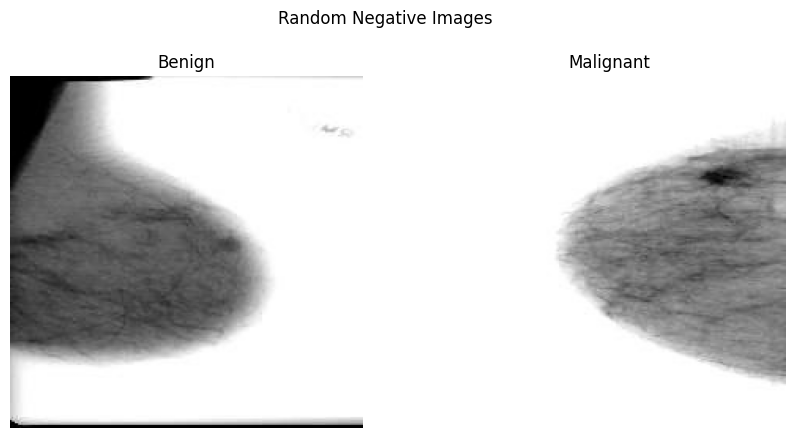

In [90]:
#Verifies that negative images were correctly processed
#Ensures the images are properly stored in their respective directories (0 = Benign, 1 = Malignant)
#Helps identify errors or incorrect image transformations
#Useful for sanity checks before training ResNet50 on negative images

import random


# Function to display one random sample image from each category
def display_random_samples(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random Negative Images')
    plt.show()

# Display one random sample from the output directory
display_random_samples(Neg_dir, subdirs)

In [93]:
#Enhances contrast in medical images (especially mammograms).
#Makes tumors, tissues, and patterns more visible.
#Prepares preprocessed images for ResNet50 training.
#Ensures equal brightness across different regions (compared to standard histogram equalization).

from skimage import exposure

# Define the data directory and the output directory
data_dir = '../kaggle/working/merged_images'
AHE_dir = '../kaggle/working/AHistogram_Images'

# Create the output directory if it doesn't exist
os.makedirs(AHE_dir, exist_ok=True)

# Define the subdirectories for benign and malignant images
subdirs = ['0', '1']  # 0 for Benign, 1 for Malignant

# Function to apply Adaptive Histogram Equalization and save images
def apply_adaptive_histogram_equalization(data_dir, output_dir):
    for subdir in subdirs:
        # Create a corresponding subdirectory in the output directory
        os.makedirs(os.path.join(output_dir, subdir), exist_ok=True)
        
        # Define the path to the current subdirectory
        current_dir = os.path.join(data_dir, subdir)
        
        # Loop through all images in the current subdirectory
        for filename in os.listdir(current_dir):
            # Construct the full file path
            file_path = os.path.join(current_dir, filename)
            
            # Read the image
            image = cv2.imread(file_path)
            
            # Check if the image was loaded successfully
            if image is not None:
                # Convert to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
                # Apply Adaptive Histogram Equalization
                image_adapteq = exposure.equalize_adapthist(gray_image, clip_limit=0.03)
                
                # Convert the image back to uint8 format (0-255)
                image_adapteq = (image_adapteq * 255).astype(np.uint8)
                
                # Save the equalized image in the corresponding output directory
                output_file_path = os.path.join(output_dir, subdir, filename)
                cv2.imwrite(output_file_path, image_adapteq)
            else:
                print(f"Warning: Could not read image {file_path}")

# Call the function to apply the transformation
apply_adaptive_histogram_equalization(data_dir, AHE_dir)

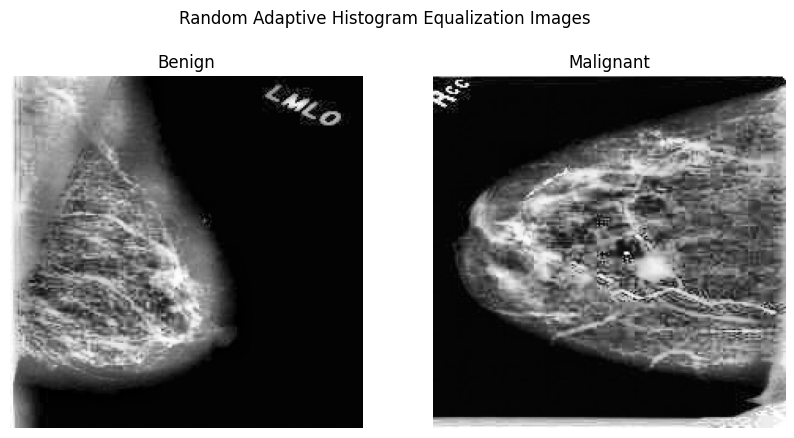

In [94]:
# Function to display one random sample image from each category
def display_random_samples(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random Adaptive Histogram Equalization Images')
    plt.show()


# Display one random sample from the output directory
display_random_samples('../kaggle/working/AHistogram_Images', subdirs)

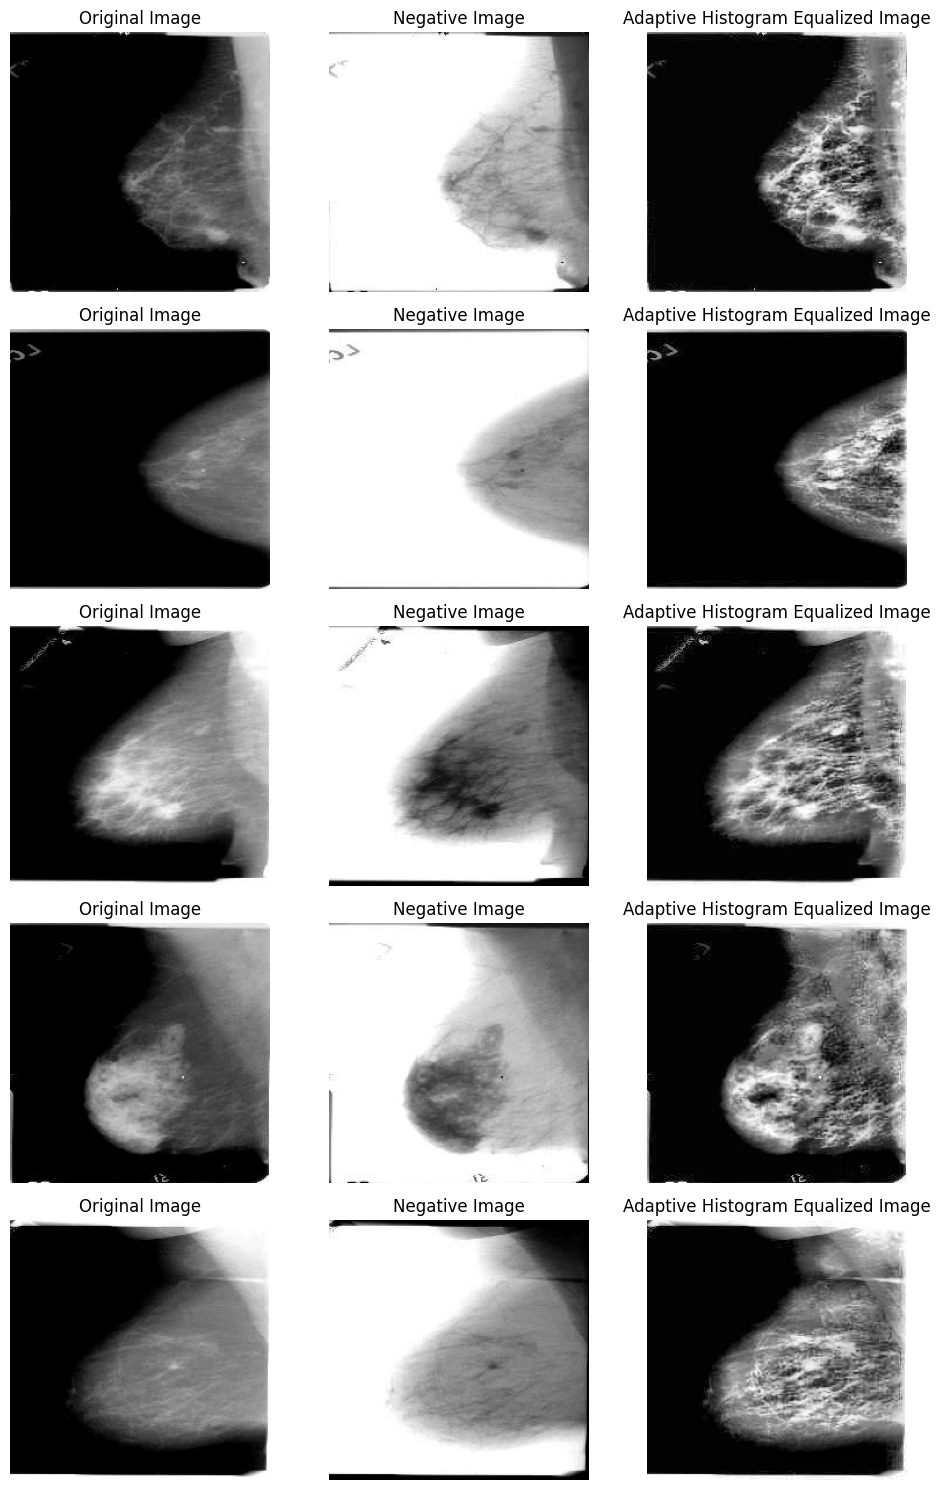

In [95]:
def display_images():
    # Get the image names from the merged images directory
    image_names = [f for f in os.listdir('../kaggle/working/merged_images/1') if f.endswith(('.jpg', '.png'))][:5]

    # Create subplots for 5 images and 3 columns (original, Negative , Adaptive histogram equalized)
    fig, axs = plt.subplots(5, 3, figsize=(10, 15))

    for i, image_name in enumerate(image_names):
        # Get the full paths to the images
        image_path1 = os.path.join('../kaggle/working/merged_images/1', image_name)  # Original Image
        image_path2 = os.path.join('../kaggle/working/Negative_Images/1', image_name)  # Negative Image
        image_path3 = os.path.join('../kaggle/working/AHistogram_Images/1', image_name)  # Adaptive Histogram Equalized Image

        # Open the images
        image1 = Image.open(image_path1).convert('L')  # Convert to grayscale for original
        image2 = Image.open(image_path2)
        image3 = Image.open(image_path3)

        # Display the images in the subplots
        axs[i, 0].imshow(image1, cmap='gray')
        axs[i, 0].axis('off')
        axs[i, 0].set_title('Original Image')

        axs[i, 1].imshow(image2, cmap='gray')
        axs[i, 1].axis('off')
        axs[i, 1].set_title('Negative Image')

        axs[i, 2].imshow(image3, cmap='gray')
        axs[i, 2].axis('off')
        axs[i, 2].set_title('Adaptive Histogram Equalized Image')

    plt.tight_layout()
    plt.show()

display_images()

In [57]:
from skimage import feature

# Define the data directory and the output directory
data_dir = '../kaggle/working/merged_images'
output_dir = '../kaggle/working/Hog_Images'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the subdirectories for benign and malignant images
subdirs = ['0', '1']  # 0 for Benign, 1 for Malignant

def apply_hog_and_save(data_dir, output_dir):
    # Iterate through each subdirectory
    for subdir in subdirs:
        # Create a corresponding subdirectory in the output directory
        os.makedirs(os.path.join(output_dir, subdir), exist_ok=True)
        
        # Define the path to the current subdirectory
        current_dir = os.path.join(data_dir, subdir)
        
        # Get the list of image files in the current subdirectory
        image_files = os.listdir(current_dir)
        
        # Process each image file
        for filename in image_files:
            # Prepare the full path for the image
            file_path = os.path.join(current_dir, filename)
            output_path = os.path.join(output_dir, subdir, filename)
            
            # Read the image
            image = cv2.imread(file_path)
            
            # Check if the image was loaded successfully
            if image is not None:
                # Convert to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
                # Compute HOG features
                hog_features, hog_image = feature.hog(
                    gray_image,
                    orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=True
                )
                
                # Scale the HOG image for better visualization
                hog_image = (hog_image * 255).astype(np.uint8)
                
                # Save the HOG image
                cv2.imwrite(output_path, hog_image)
            else:
                print(f"Warning: Could not read image {file_path}")

# Call the function to apply HOG and save images
# apply_hog_and_save(data_dir, output_dir)

print("HOG features extracted and images saved successfully.")

HOG features extracted and images saved successfully.


In [100]:
# Define the data directory and the output directory
data_dir = '../kaggle/working/Negative_Images'
output_dir = '../kaggle/working/HogNeg_Images'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Call the function to apply HOG and save images
apply_hog_and_save(data_dir, output_dir)

print("HOG features extracted and images saved successfully.")

HOG features extracted and images saved successfully.


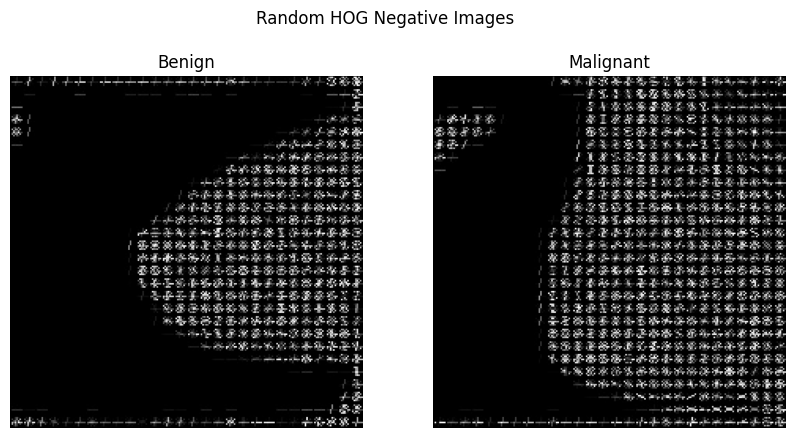

In [101]:
import random


# Function to display one random sample image from each category
def display_random_samplesHogNeg(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random HOG Negative Images')
    plt.show()

subdirs = ['0', '1']

# Display one random sample from the output directory
display_random_samplesHogNeg('../kaggle/working/HogNeg_Images', subdirs)

In [58]:
# Define the data directory and the output directory
data_dir = '../kaggle/working/AHistogram_Images'
output_dir = '../kaggle/working/HogAHE_Images'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Call the function to apply HOG and save images
apply_hog_and_save(data_dir, output_dir)

print("HOG features extracted and images saved successfully")

HOG features extracted and images saved successfully


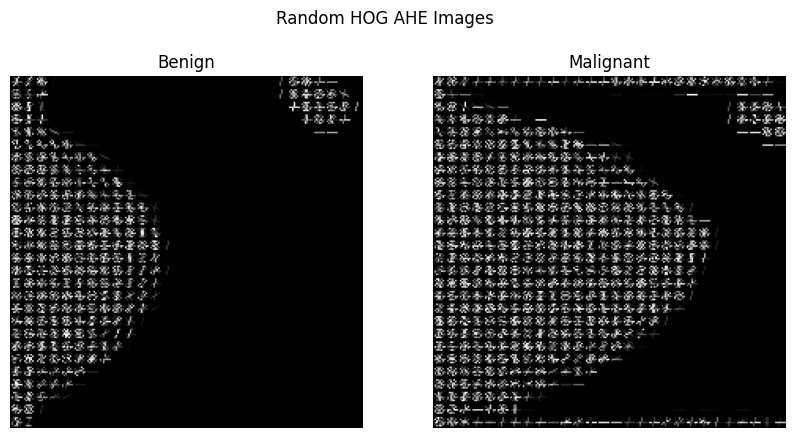

In [61]:
import random


# Function to display one random sample image from each category
def display_random_samplesHogNeg(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random HOG AHE Images')
    plt.show()

subdirs = ['0', '1']

# Display one random sample from the output directory
display_random_samplesHogNeg('../kaggle/working/HogAHE_Images', subdirs)

In [64]:
import tensorflow as tf

data_dir = '../kaggle/working/merged_images'  

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    seed=50,
    shuffle=True,
    batch_size=13
)
# Calculate the total number of samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

train_size = int(0.8 * total_samples)                 
val_size   = int(0.15 * total_samples)                
test_size = total_samples - train_size - val_size     

# Create train, validation, and test datasets
train_dataset       = full_dataset.take(train_size)
validation_dataset  = full_dataset.skip(train_size).take(val_size)
test_dataset        = full_dataset.skip(train_size + val_size)

train_dataset      = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset       = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Print the number of samples in each dataset
print(f"Train samples:      {train_size}     batches(13) ==> {train_size*13}")
print(f"Validation samples: {val_size}       batches(13) ==> {val_size*13}")
print(f"Test samples:       {test_size}      batches(13) ==> {test_size*13}")

Found 43095 files belonging to 2 classes.
Train samples:      2652     batches(13) ==> 34476
Validation samples: 497       batches(13) ==> 6461
Test samples:       166      batches(13) ==> 2158


In [67]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import os
import csv
from tqdm import tqdm
import gc

def build_resnet_pinn_model():
    # Load ResNet50 with pretrained ImageNet weights.
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Freeze all layers initially.
    for layer in base_model.layers:
        layer.trainable = False

    # Unfreeze the last 70% of layers.
    from_index = int(np.round((len(base_model.layers) - 1) * (1.0 - 70.0/100.0)))
    for layer in base_model.layers[from_index:]:
        layer.trainable = True

    # Feature extraction: GlobalAveragePooling2D to get flat features.
    flat = GlobalAveragePooling2D()(base_model.output)
    
    # Physics-informed branch: process the flat features.
    mlp_dense1 = Dense(256, activation='tanh', name="mlp_dense1")
    mlp_dense2 = Dense(128, activation='tanh', name="mlp_dense2")
    mlp_out    = Dense(1, activation=None, name="mlp_out")  # Output scalar (no activation)
    physics = mlp_dense1(flat)
    physics = mlp_dense2(physics)
    physics = mlp_out(physics)
    
    # Fusion: concatenate flat features with physics output.
    combined = Concatenate()([flat, physics])
    
    # Classification head.
    x = Dense(128, activation='relu')(combined)
    x = Dropout(0.4)(x)
    predictions = Dense(2, activation='softmax', name="classification")(x)  # Binary classification (2 classes)

    # Create model.
    model = Model(inputs=base_model.input, outputs=[predictions, physics, flat])
    
    # Attach the MLP layers to the model instance for physics loss computation.
    model.mlp_dense1 = mlp_dense1
    model.mlp_dense2 = mlp_dense2
    model.mlp_out = mlp_out
    
    return model

# Hyperparameters.
D = 0.1           
lambda_pde = 0.1  

def compute_physics_loss(model, flat, physics):
    """
    Compute a physics loss that enforces a PDE-like constraint.
    We compute the gradient of the physics branch output with respect to the flat features,
    then enforce that its L2 norm approximates D * |physics|.
    """
    with tf.GradientTape() as tape:
        tape.watch(flat)
        physics_out = model.mlp_out(model.mlp_dense2(model.mlp_dense1(flat)))
    grad_physics = tape.gradient(physics_out, flat)  # shape: (batch, flat_dim)
    grad_norm = tf.norm(grad_physics, axis=1)          # shape: (batch,)
    residual = grad_norm - D * tf.abs(tf.squeeze(physics))
    physics_loss = tf.reduce_mean(tf.square(residual))
    return physics_loss

@tf.function
def train_step(model, optimizer, images, labels):
    with tf.GradientTape() as tape:
        pred, physics, flat = model(images, training=True)
        # Use sparse categorical crossentropy since labels are integers.
        loss_class = tf.keras.losses.sparse_categorical_crossentropy(labels, pred)
        loss_class = tf.reduce_mean(loss_class)
        loss_physics = compute_physics_loss(model, flat, physics)
        total_loss = loss_class + lambda_pde * loss_physics
    gradients = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return total_loss, loss_class, loss_physics

def train_model(model, train_dataset, val_dataset, epochs=10, log_csv="training_log.csv"):
    optimizer = RMSprop(learning_rate=1e-4)
    
    # Create and initialize CSV log file.
    with open(log_csv, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["epoch", "train_loss", "class_loss", "physics_loss", "val_loss", "val_accuracy"])
    
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        total_loss_epoch = 0.0
        total_class_loss_epoch = 0.0
        total_physics_loss_epoch = 0.0
        num_batches = 0
        
        # Training loop with progress bar.
        for images, labels in tqdm(train_dataset, desc=f"Training Epoch {epoch+1}", unit="batch"):
            if labels.shape[-1] > 1:
                labels = tf.argmax(labels, axis=1, output_type=tf.int32)
                labels = tf.expand_dims(labels, axis=-1)
            labels = tf.cast(labels, tf.int32)
            
            loss_total, loss_class, loss_physics = train_step(model, optimizer, images, labels)
            total_loss_epoch += loss_total
            total_class_loss_epoch += loss_class
            total_physics_loss_epoch += loss_physics
            num_batches += 1
        
        avg_total_loss = total_loss_epoch / num_batches
        avg_class_loss = total_class_loss_epoch / num_batches
        avg_physics_loss = total_physics_loss_epoch / num_batches
        print(f"Train Loss: {avg_total_loss:.4f} | Classification Loss: {avg_class_loss:.4f} | Physics Loss: {avg_physics_loss:.4f}")
        
        # Validation loop with progress bar and accuracy metric.
        val_loss = 0.0
        val_batches = 0
        val_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()
        for images, labels in tqdm(val_dataset, desc=f"Validation Epoch {epoch+1}", unit="batch"):
            if labels.shape[-1] > 1:
                labels = tf.argmax(labels, axis=1, output_type=tf.int32)
                labels = tf.expand_dims(labels, axis=-1)
            labels = tf.cast(labels, tf.int32)
            pred, _, _ = model(images, training=False)
            loss_val = tf.keras.losses.sparse_categorical_crossentropy(labels, pred)
            loss_val = tf.reduce_mean(loss_val)
            val_loss += loss_val
            val_batches += 1
            val_accuracy_metric.update_state(labels, pred)
        avg_val_loss = val_loss / val_batches
        avg_val_accuracy = val_accuracy_metric.result().numpy()
        print(f"Validation Loss: {avg_val_loss:.4f} | Validation Accuracy: {avg_val_accuracy:.4f}")
        
        # Log epoch metrics to CSV.
        with open(log_csv, 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow([epoch+1, float(avg_total_loss), float(avg_class_loss),
                             float(avg_physics_loss), float(avg_val_loss), float(avg_val_accuracy)])
        
        # Save the model in .keras format after each epoch.
        model.save(f"model_epoch_{epoch+1}.keras", save_format="keras")
        print(f"Model saved as model_epoch_{epoch+1}.keras")
    
    return model

def evaluate_model(model, test_dataset):
    test_loss = 0.0
    test_batches = 0
    for images, labels in test_dataset:
        if labels.shape[-1] > 1:
            labels = tf.argmax(labels, axis=1, output_type=tf.int32)
            labels = tf.expand_dims(labels, axis=-1)
        labels = tf.cast(labels, tf.int32)
        pred, _, _ = model(images, training=False)
        loss = tf.keras.losses.sparse_categorical_crossentropy(labels, pred)
        loss = tf.reduce_mean(loss)
        test_loss += loss
        test_batches += 1
    print(f"Test Loss: {test_loss/test_batches:.4f}")

# IMPORTANT: Define your train_dataset, validation_dataset, and test_dataset before training.
# For example, you might use:
# train_dataset = tf.keras.preprocessing.image_dataset_from_directory(...)

# Build the model (this defines model_pinn).
model_pinn = build_resnet_pinn_model()

# Train the model.
trained_model = train_model(model_pinn, train_dataset, validation_dataset, epochs=7, log_csv="training_log.csv")
evaluate_model(trained_model, test_dataset)

gc.collect()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step

Epoch 1/7


Training Epoch 1: 100%|██████████| 2652/2652 [2:23:31<00:00,  3.25s/batch]


Train Loss: 0.4060 | Classification Loss: 0.4056 | Physics Loss: 0.0045


Validation Epoch 1: 100%|██████████| 497/497 [16:10<00:00,  1.95s/batch]


Validation Loss: 0.3038 | Validation Accuracy: 0.9011
Model saved as model_epoch_1.keras

Epoch 2/7


Training Epoch 2: 100%|██████████| 2652/2652 [2:21:14<00:00,  3.20s/batch]  


Train Loss: 0.1552 | Classification Loss: 0.1552 | Physics Loss: 0.0006


Validation Epoch 2: 100%|██████████| 497/497 [15:01<00:00,  1.81s/batch]


Validation Loss: 0.1556 | Validation Accuracy: 0.9571
Model saved as model_epoch_2.keras

Epoch 3/7


Training Epoch 3: 100%|██████████| 2652/2652 [2:22:53<00:00,  3.23s/batch]


Train Loss: 0.0928 | Classification Loss: 0.0928 | Physics Loss: 0.0004


Validation Epoch 3: 100%|██████████| 497/497 [15:06<00:00,  1.82s/batch]


Validation Loss: 0.1273 | Validation Accuracy: 0.9647
Model saved as model_epoch_3.keras

Epoch 4/7


Training Epoch 4: 100%|██████████| 2652/2652 [2:23:07<00:00,  3.24s/batch]  


Train Loss: 0.0687 | Classification Loss: 0.0686 | Physics Loss: 0.0003


Validation Epoch 4: 100%|██████████| 497/497 [15:02<00:00,  1.82s/batch]


Validation Loss: 0.2222 | Validation Accuracy: 0.9506
Model saved as model_epoch_4.keras

Epoch 5/7


Training Epoch 5: 100%|██████████| 2652/2652 [2:26:26<00:00,  3.31s/batch]  


Train Loss: 0.0567 | Classification Loss: 0.0567 | Physics Loss: 0.0002


Validation Epoch 5: 100%|██████████| 497/497 [15:02<00:00,  1.82s/batch]


Validation Loss: 0.1237 | Validation Accuracy: 0.9748
Model saved as model_epoch_5.keras

Epoch 6/7


Training Epoch 6: 100%|██████████| 2652/2652 [2:24:59<00:00,  3.28s/batch]  


Train Loss: 0.0457 | Classification Loss: 0.0457 | Physics Loss: 0.0002


Validation Epoch 6: 100%|██████████| 497/497 [15:05<00:00,  1.82s/batch]


Validation Loss: 0.1414 | Validation Accuracy: 0.9711
Model saved as model_epoch_6.keras

Epoch 7/7


Training Epoch 7: 100%|██████████| 2652/2652 [2:16:09<00:00,  3.08s/batch]


Train Loss: 0.0432 | Classification Loss: 0.0432 | Physics Loss: 0.0002


Validation Epoch 7: 100%|██████████| 497/497 [13:26<00:00,  1.62s/batch]


Validation Loss: 0.1282 | Validation Accuracy: 0.9752
Model saved as model_epoch_7.keras
Test Loss: 0.1393


5031

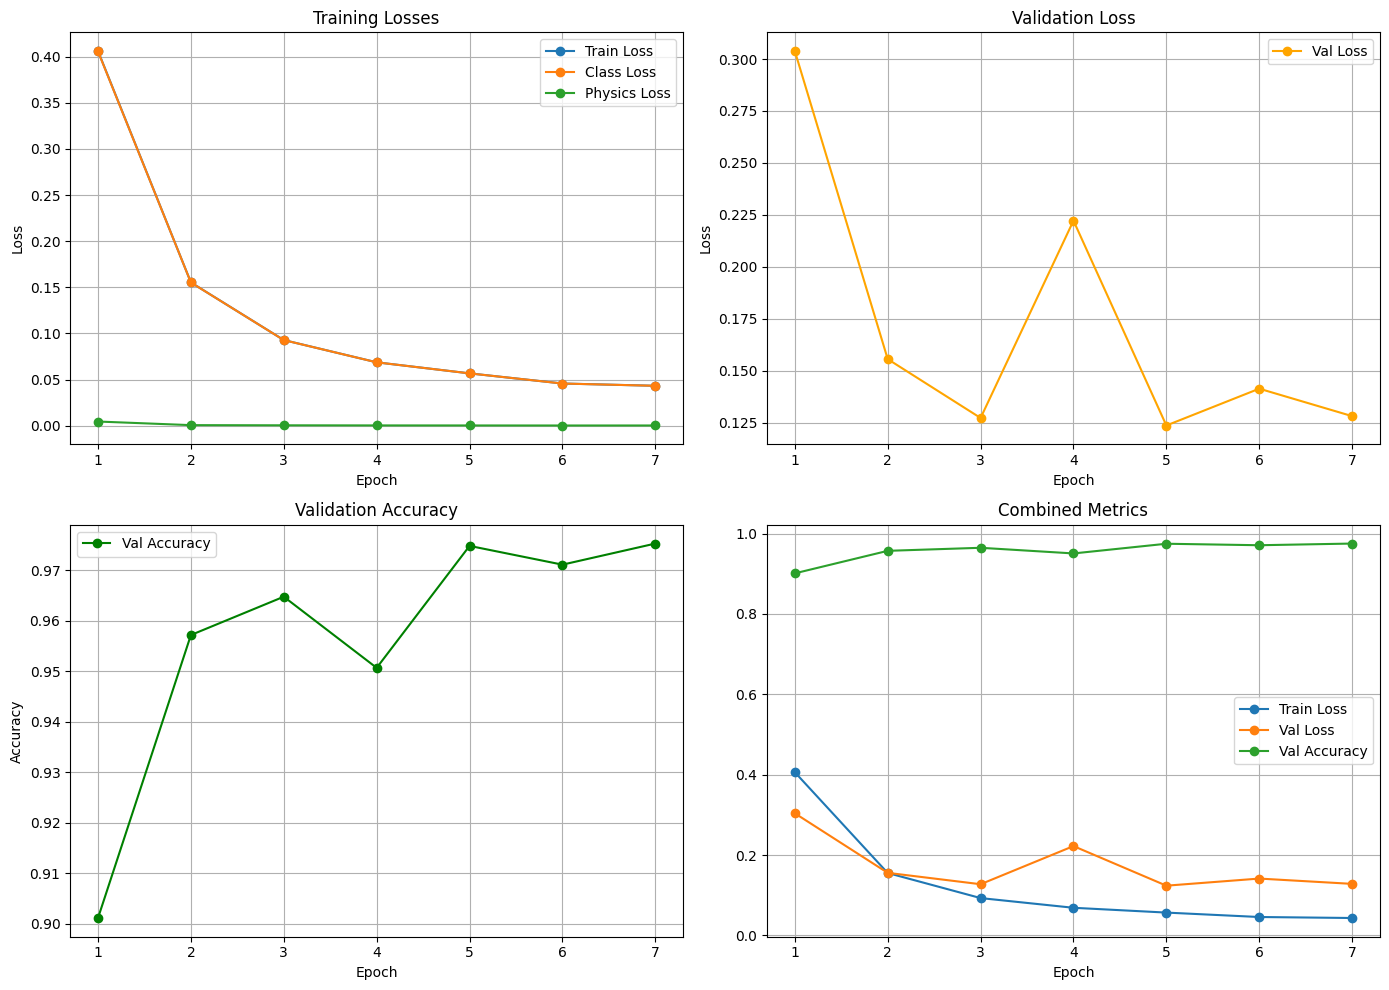

In [68]:
#!/usr/bin/env python3
"""
Plot training metrics from a CSV log file.

The CSV file should contain the following columns:
epoch, train_loss, class_loss, physics_loss, val_loss, val_accuracy
"""

import pandas as pd
import matplotlib.pyplot as plt


def plot_training_metrics(csv_file: str) -> None:
    """
    Plot training and validation metrics from a CSV file.

    Parameters:
        csv_file (str): Path to the CSV log file.
    """
    # Read CSV file into a DataFrame.
    df = pd.read_csv(csv_file)

    # Extract epochs and metrics.
    epochs = df['epoch']
    train_loss = df['train_loss']
    class_loss = df['class_loss']
    physics_loss = df['physics_loss']
    val_loss = df['val_loss']
    val_accuracy = df['val_accuracy']

    # Create a figure with 4 subplots.
    plt.figure(figsize=(14, 10))

    # Plot Training Losses.
    plt.subplot(2, 2, 1)
    plt.plot(epochs, train_loss, marker='o', label='Train Loss')
    plt.plot(epochs, class_loss, marker='o', label='Class Loss')
    plt.plot(epochs, physics_loss, marker='o', label='Physics Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Losses')
    plt.legend()
    plt.grid(True)

    # Plot Validation Loss.
    plt.subplot(2, 2, 2)
    plt.plot(epochs, val_loss, marker='o', color='orange', label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()
    plt.grid(True)

    # Plot Validation Accuracy.
    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_accuracy, marker='o', color='green', label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()
    plt.grid(True)

    # Combined plot: Overlay training loss, validation loss, and validation accuracy.
    plt.subplot(2, 2, 4)
    plt.plot(epochs, train_loss, marker='o', label='Train Loss')
    plt.plot(epochs, val_loss, marker='o', label='Val Loss')
    plt.plot(epochs, val_accuracy, marker='o', label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.title('Combined Metrics')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    csv_file_path = 'training_log.csv'  # Update with your local CSV file path if necessary.
    plot_training_metrics(csv_file_path)


Evaluating ./model_epoch_1.keras ...
Epoch 1: Precision=0.8689, Recall=0.9454, Accuracy=0.9011
Evaluating ./model_epoch_2.keras ...
Epoch 2: Precision=0.9353, Recall=0.9824, Accuracy=0.9571
Evaluating ./model_epoch_3.keras ...
Epoch 3: Precision=0.9676, Recall=0.9614, Accuracy=0.9646
Evaluating ./model_epoch_4.keras ...
Epoch 4: Precision=0.9825, Recall=0.9175, Accuracy=0.9505
Evaluating ./model_epoch_5.keras ...
Epoch 5: Precision=0.9809, Recall=0.9691, Accuracy=0.9751
Evaluating ./model_epoch_6.keras ...
Epoch 6: Precision=0.9768, Recall=0.9641, Accuracy=0.9706
Evaluating ./model_epoch_7.keras ...
Epoch 7: Precision=0.9646, Recall=0.9864, Accuracy=0.9751


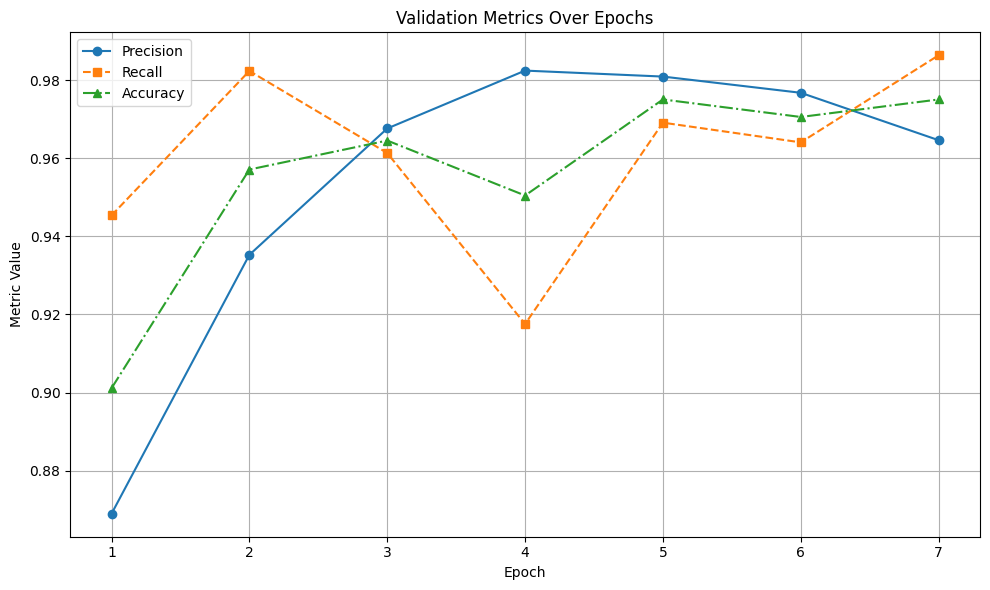

: 

In [ ]:
#!/usr/bin/env python3
"""
Plot precision, recall, and accuracy curves across training epochs.

This script assumes that you have saved models named "model_epoch_1.keras", 
"model_epoch_2.keras", ..., "model_epoch_N.keras" and that your validation dataset 
is available as 'val_dataset' (a tf.data.Dataset yielding (images, labels) pairs).
It computes metrics using scikit-learn's precision_score, recall_score, and calculates 
accuracy manually.
"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
import os

# Ensure you have your validation dataset defined.
# For example, if you used:
# val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     validation_dir,
#     image_size=(224,224),
#     batch_size=13,
#     shuffle=False
# )
# then 'val_dataset' should be available here.
# For demonstration, we assume val_dataset is already defined.

def compute_epoch_metrics(model_path: str, val_dataset: tf.data.Dataset) -> tuple:
    """
    Load the model from the given path, run it on the validation dataset,
    and compute precision, recall, and accuracy.

    Parameters:
        model_path (str): Path to the saved model.
        val_dataset (tf.data.Dataset): Validation dataset yielding (images, labels).

    Returns:
        tuple: (precision, recall, accuracy)
    """
    model = tf.keras.models.load_model(model_path, compile=False)
    all_true = []
    all_pred = []
    
    for images, labels in val_dataset:
        # Convert labels to integer form if they are one-hot.
        if labels.shape[-1] > 1:
            labels = tf.argmax(labels, axis=1, output_type=tf.int32)
        else:
            labels = tf.cast(labels, tf.int32)
        preds, _, _ = model(images, training=False)
        preds = tf.argmax(preds, axis=1, output_type=tf.int32)
        
        all_true.extend(labels.numpy())
        all_pred.extend(preds.numpy())
    
    all_true = np.array(all_true)
    all_pred = np.array(all_pred)
    
    precision = precision_score(all_true, all_pred, average='binary', zero_division=0)
    recall = recall_score(all_true, all_pred, average='binary', zero_division=0)
    accuracy = np.mean(all_true == all_pred)
    
    return precision, recall, accuracy

def plot_metrics_over_epochs(num_epochs: int, val_dataset: tf.data.Dataset, model_dir: str = ".") -> None:
    """
    Compute and plot precision, recall, and accuracy for each epoch model.

    Parameters:
        num_epochs (int): Number of epochs/models to evaluate.
        val_dataset (tf.data.Dataset): Validation dataset.
        model_dir (str): Directory where epoch models are stored.
    """
    precision_list = []
    recall_list = []
    accuracy_list = []
    epochs = np.arange(1, num_epochs+1)
    
    for epoch in epochs:
        model_path = os.path.join(model_dir, f"model_epoch_{epoch}.keras")
        print(f"Evaluating {model_path} ...")
        prec, rec, acc = compute_epoch_metrics(model_path, val_dataset)
        precision_list.append(prec)
        recall_list.append(rec)
        accuracy_list.append(acc)
        print(f"Epoch {epoch}: Precision={prec:.4f}, Recall={rec:.4f}, Accuracy={acc:.4f}")
    
    # Plot the metrics.
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, precision_list, marker='o', linestyle='-', label='Precision')
    plt.plot(epochs, recall_list, marker='s', linestyle='--', label='Recall')
    plt.plot(epochs, accuracy_list, marker='^', linestyle='-.', label='Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Metric Value")
    plt.title("Validation Metrics Over Epochs")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Number of epochs/models saved.
    NUM_EPOCHS = 7
    # Adjust model_dir if your models are saved in a different directory.
    MODEL_DIR = "."  
    plot_metrics_over_epochs(NUM_EPOCHS, validation_dataset, model_dir=MODEL_DIR)
